# Pancreas: Gene-Gene Attention Visualization & Clustering Comparison

This notebook do the preprocesssing, quality control, visualizes gene-gene attention, UMAP, clustering.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scripts.gene_gene_attention_analysis import GeneGeneAttentionAnalyzer

# Initialize the analyzing targets
model_type = 'no_seq'
edge_type = 'tx-tx'
layer_index = 4
test_mode = True

# Marker genes for each cell type in Pancreas
marker_genes_dict = {
    "Tumor Cells": ["CFTR", "CFB", "CXCL6", "EPCAM"],
    "Fibroblasts": ["PDGFRA", "ACTA2", "VCAN", "CTHRC1", "C1R"],
    "Acinar Metaplastic Cells": ["ANPEP", "AMY2A"],
    "Macrophages": ["CD68", "CD14", "MS4A6A", "LAPTM5"],
    "Mast Cells": ["KIT"],
    "T Cells": ["CD3E", "CD3D", "IL7R", "CCL5", "TRAC"],
    "B Cells": ["BANK1", "MS4A1", "CD79A"],
    "Lymphatic Endothelial Cells": ["LYVE1"],
    "Smooth Muscle Cells": ["MYH11"],
    "Endocrine": ["INS", "GCG", "PPY", "SCGN", "PCSK2", "CHGA"],
    "Endothelial": ["PECAM1", "VWF", "EPAS1", "CD93", "CD34"]
}


Loaded gene-gene attention data:
  - Attention matrices shape: 5 layers, 4 heads, 538 genes
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...


/home/f833u/fySegger/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
/home/f833u/fySegger/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


UMAP embedding completed:
  - Embedding shape: (538, 2)
Performing leiden clustering...
Clustering completed with 6 clusters
Number of genes in each cluster: [192 107  73  64  59  43]
Cluster 0: ['LILRA4' 'AQP3' 'CFAP53' 'SFTA2' 'DES']
Cluster 1: ['HNRNPA2B1' 'ATP5MD' 'AMY2A' 'GPR183' 'CD34']
Cluster 2: ['IL1B' 'STEAP4' 'CD28' 'OGN' 'MEDAG']
Cluster 3: ['NegControlProbe_00034' 'NegControlProbe_00004' 'NegControlCodeword_0526'
 'NegControlCodeword_0517' 'NegControlProbe_00035']
Cluster 4: ['RHOA' 'PFDN5' 'ASAH1' 'PTPRC' 'ATP5F1B']
Cluster 5: ['CAPN8' 'TM4SF4' 'EDN1' 'SST' 'APCDD1']
Creating gene-gene attention heatmap...


/home/f833u/segger/attention_downstream/scripts/gene_gene_attention_analysis.py:243: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(self.adata, resolution=self.resolution, random_state=self.random_state)


Creating gene-gene attention heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Fibroblasts, Acinar Metaplastic Cells, etc.


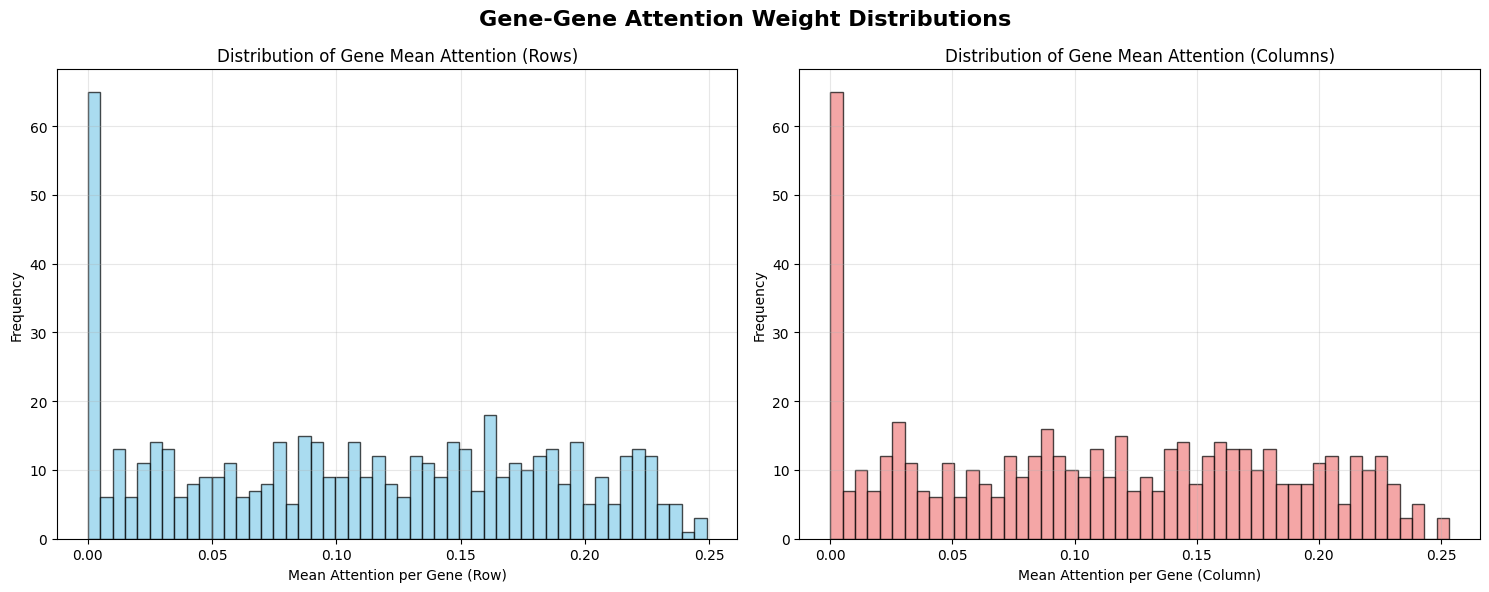

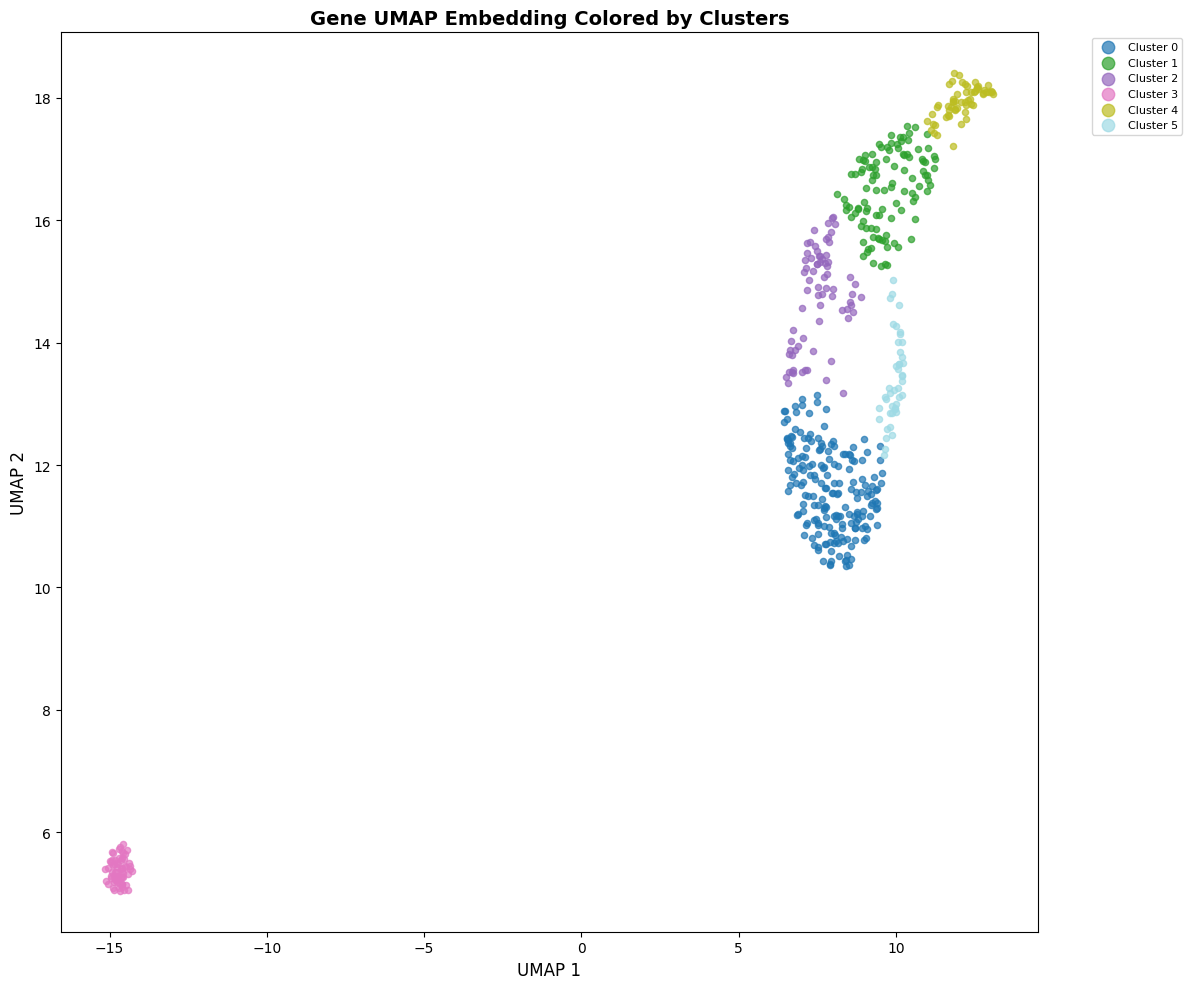

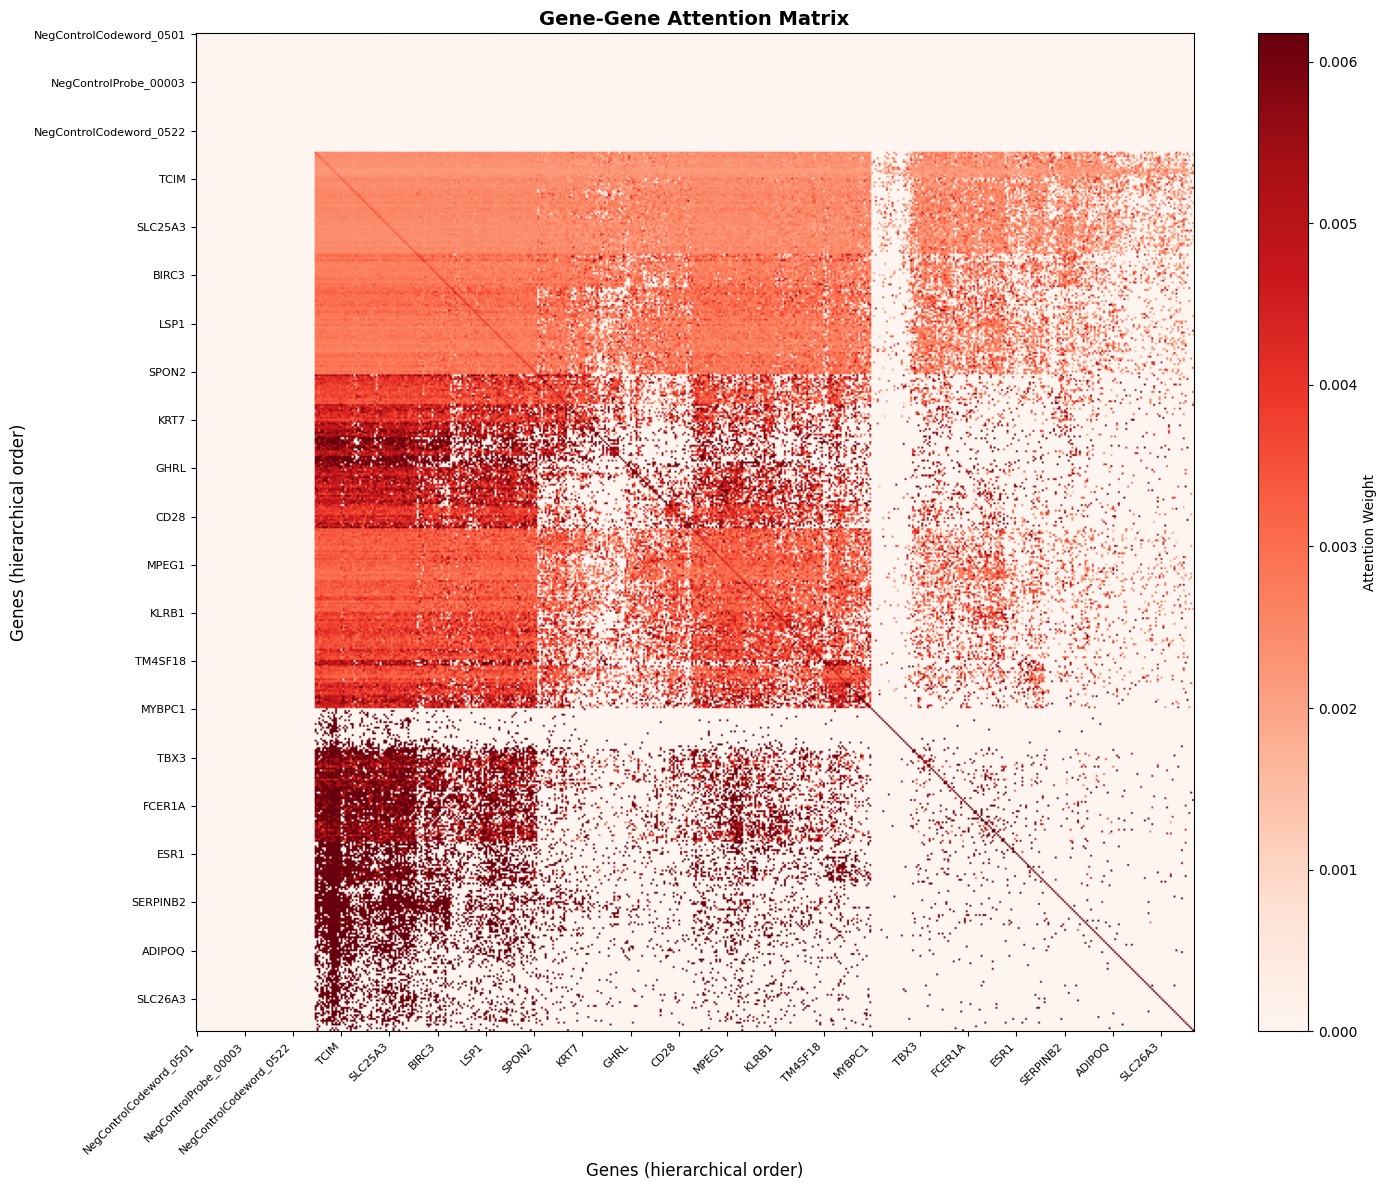

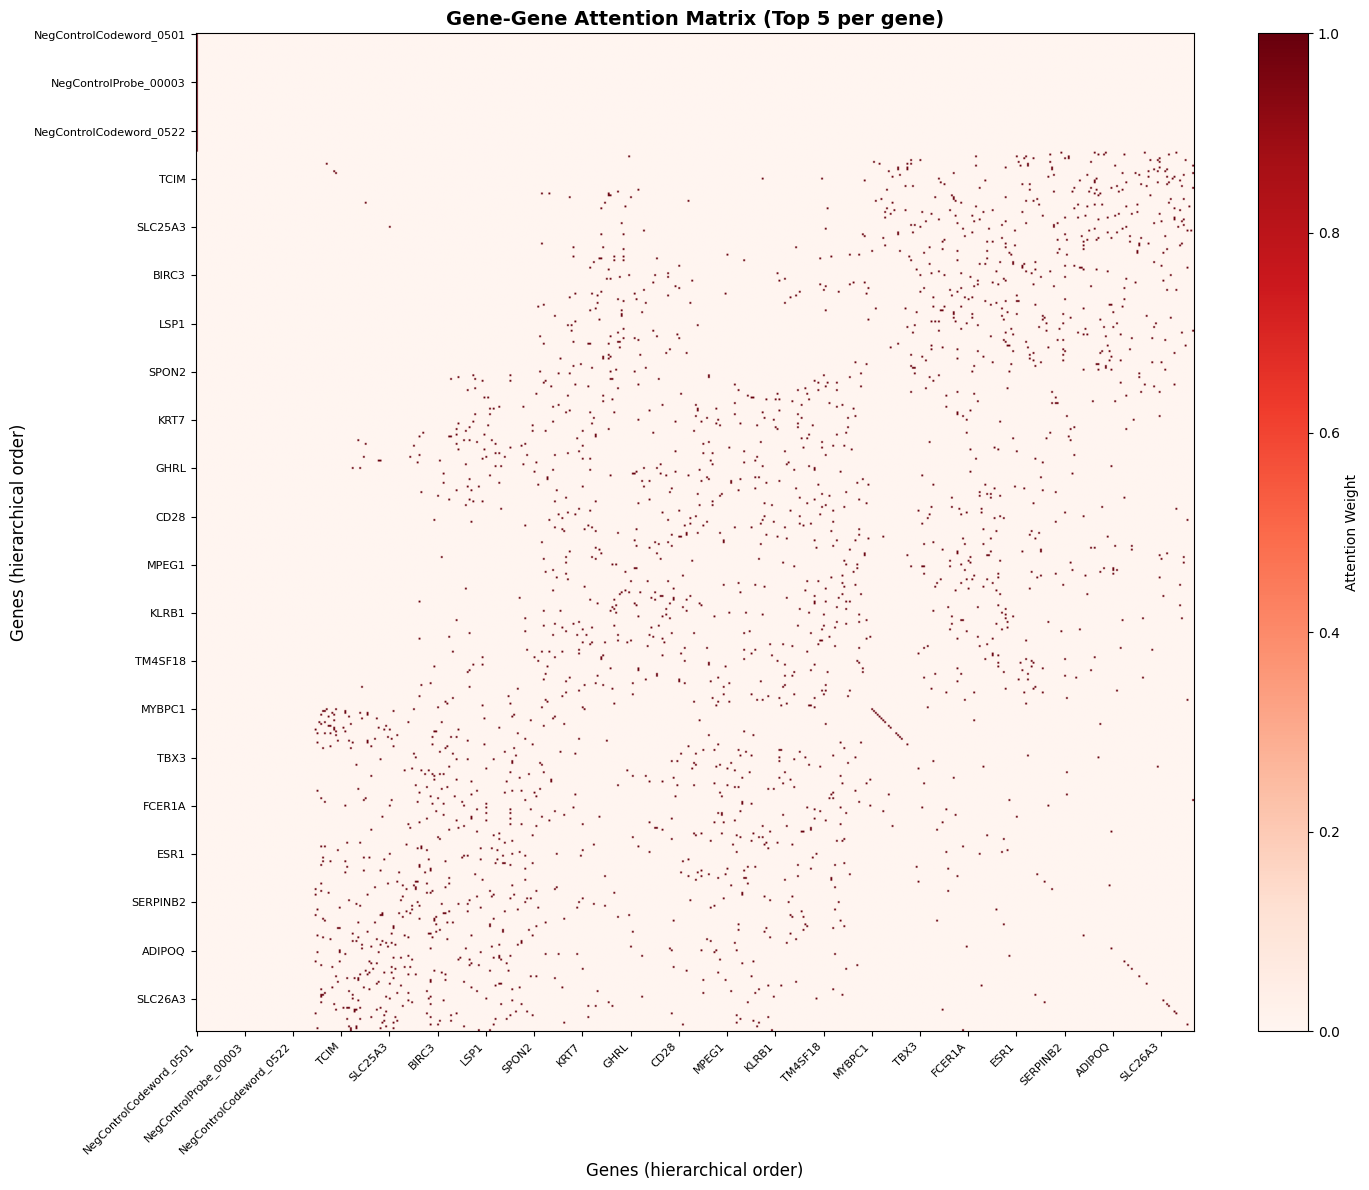

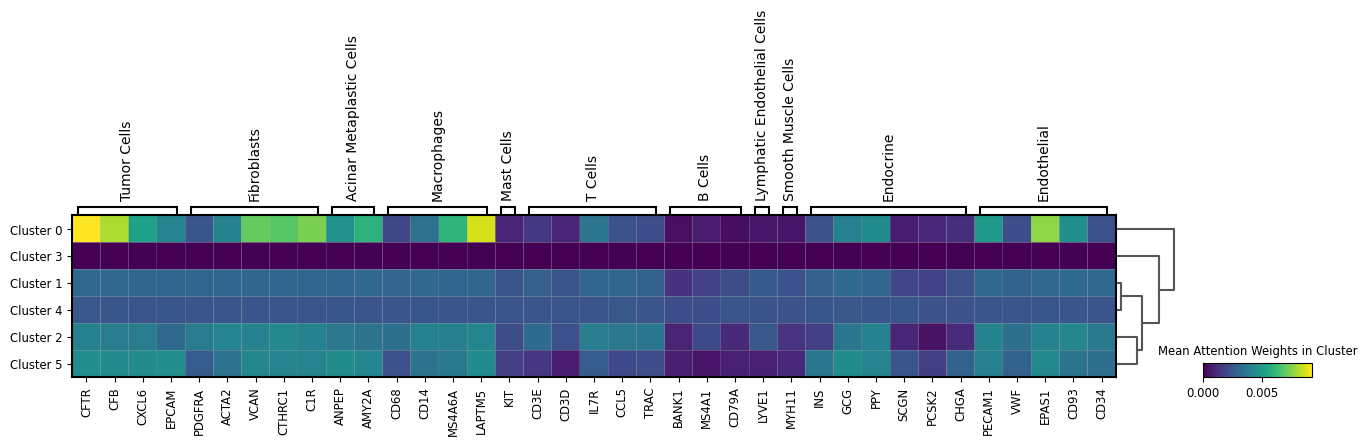

In [2]:
# Load the attention results
with open(Path('/dkfz/cluster/gpu/data/OE0606/fengyun/attention_results/pancreas') / f'attention_gene_matrix_dict_{model_type}_{edge_type}_{test_mode}.pkl', 'rb') as f:
    attention_results = pickle.load(f)
    
attention_matrices = attention_results['adj_avg_matrix']
gene_names = attention_results['gene_names']

# Initialize the analyzer
analyzer = GeneGeneAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_heads=4, num_layers=5)

kwargs = {'attention_matrices': attention_matrices, 'gene_names': gene_names, 'layer_idx': layer_index, 'marker_genes_dict': marker_genes_dict, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_dotplot': None}

analyzer.run_complete_analysis(**kwargs)

Loaded gene-gene attention data:
  - Attention matrices shape: 5 layers, 4 heads, 538 genes
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...


/home/f833u/fySegger/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


UMAP embedding completed:
  - Embedding shape: (538, 2)
Performing leiden clustering...
Clustering completed with 8 clusters
Number of genes in each cluster: [131 130  77  64  47  39  30  20]
Cluster 0: ['RHOA' 'PFDN5' 'CAPN8' 'HNRNPA2B1' 'ATP5MD']
Cluster 1: ['ASAH1' 'GPR183' 'PABPC1' 'SLC25A3' 'HSP90B1']
Cluster 2: ['FSTL1' 'SUMO2' 'STEAP4' 'ACTG2' 'PMP22']
Cluster 3: ['NegControlProbe_00034' 'NegControlProbe_00004' 'NegControlCodeword_0526'
 'NegControlCodeword_0517' 'NegControlProbe_00035']
Cluster 4: ['NOP53' 'AMY2A' 'DSP' 'FKBP11' 'SERPINB1']
Cluster 5: ['CD34' 'CLEC14A' 'TCIM' 'EPAS1' 'ADGRL4']
Cluster 6: ['PTPRC' 'CD28' 'CD3E' 'CD3D' 'SERPINB3']
Cluster 7: ['GNAS' 'SST' 'PCSK2' 'SCGB2A1' 'DLK1']
Creating gene-gene attention heatmap...
Creating gene-gene attention heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Fibroblasts, Acinar Metaplastic Cells, etc.


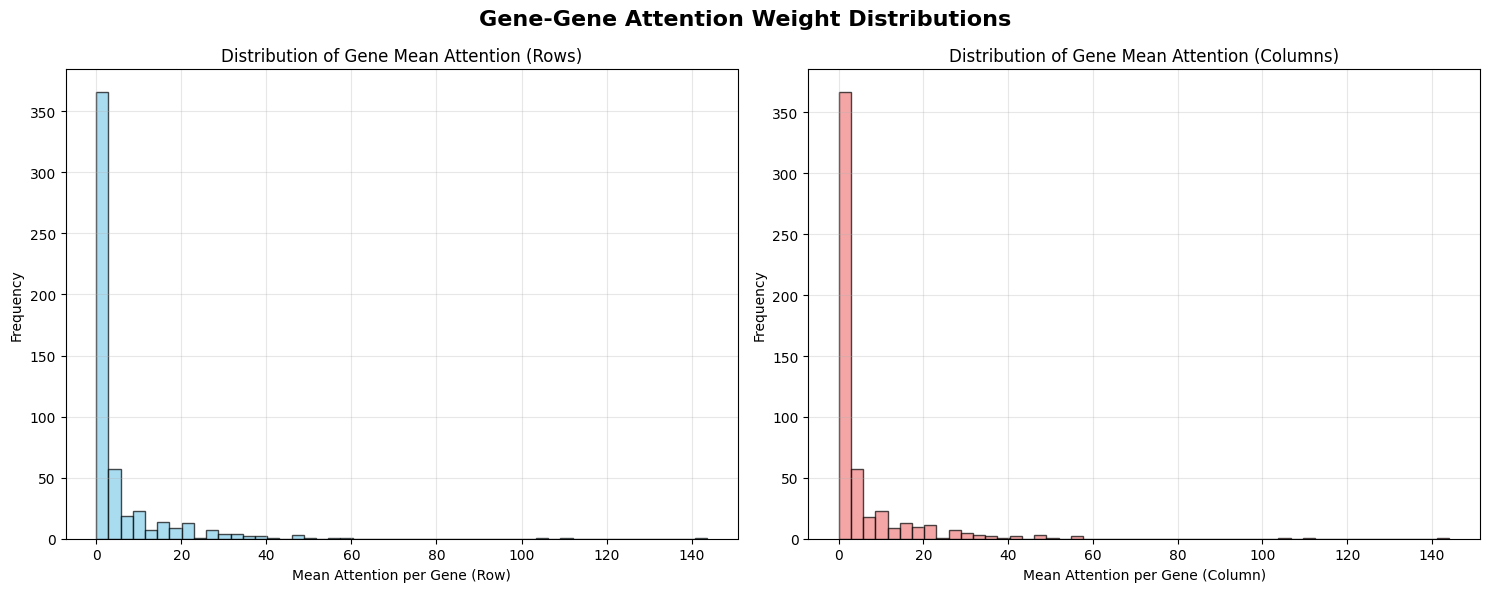

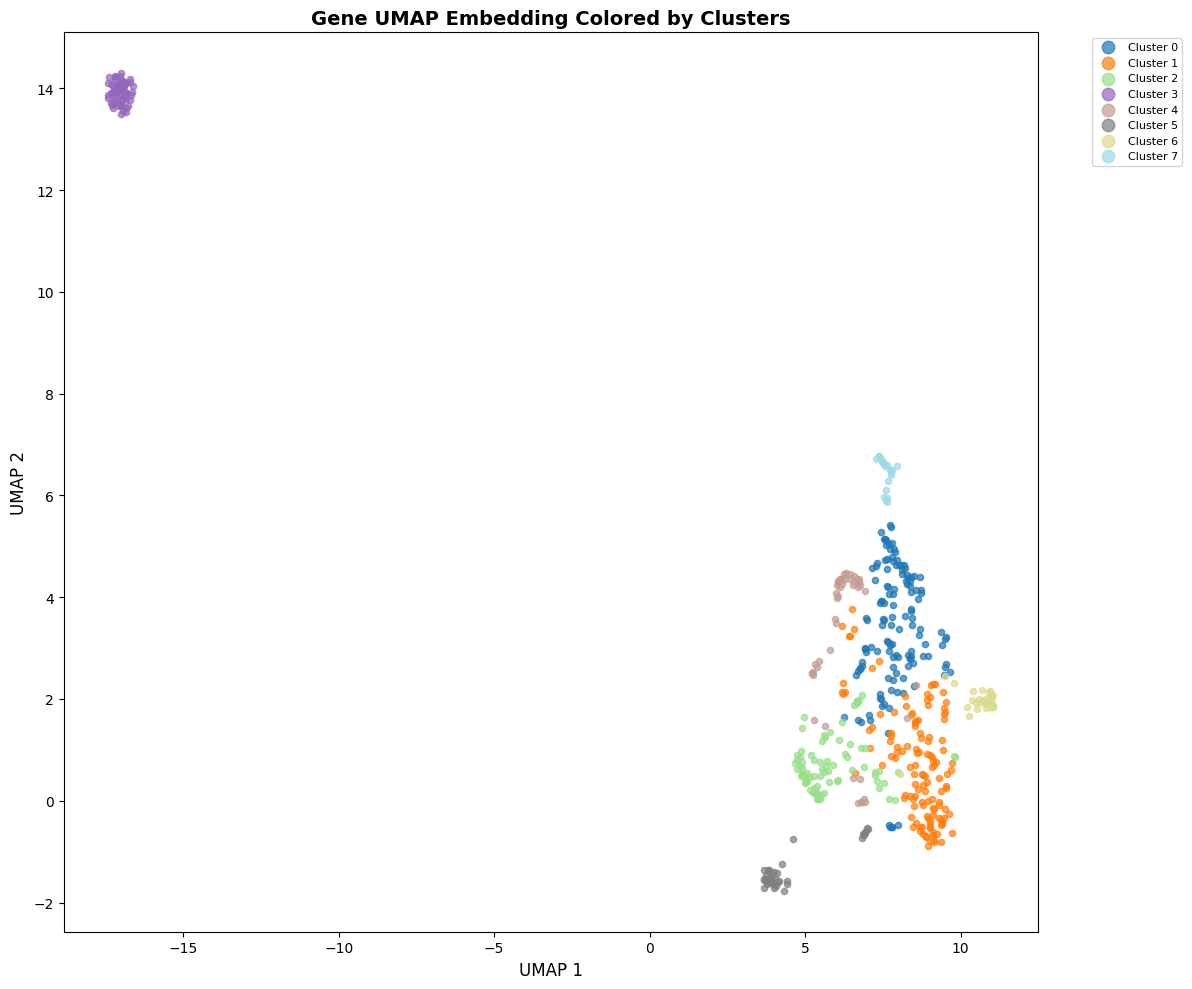

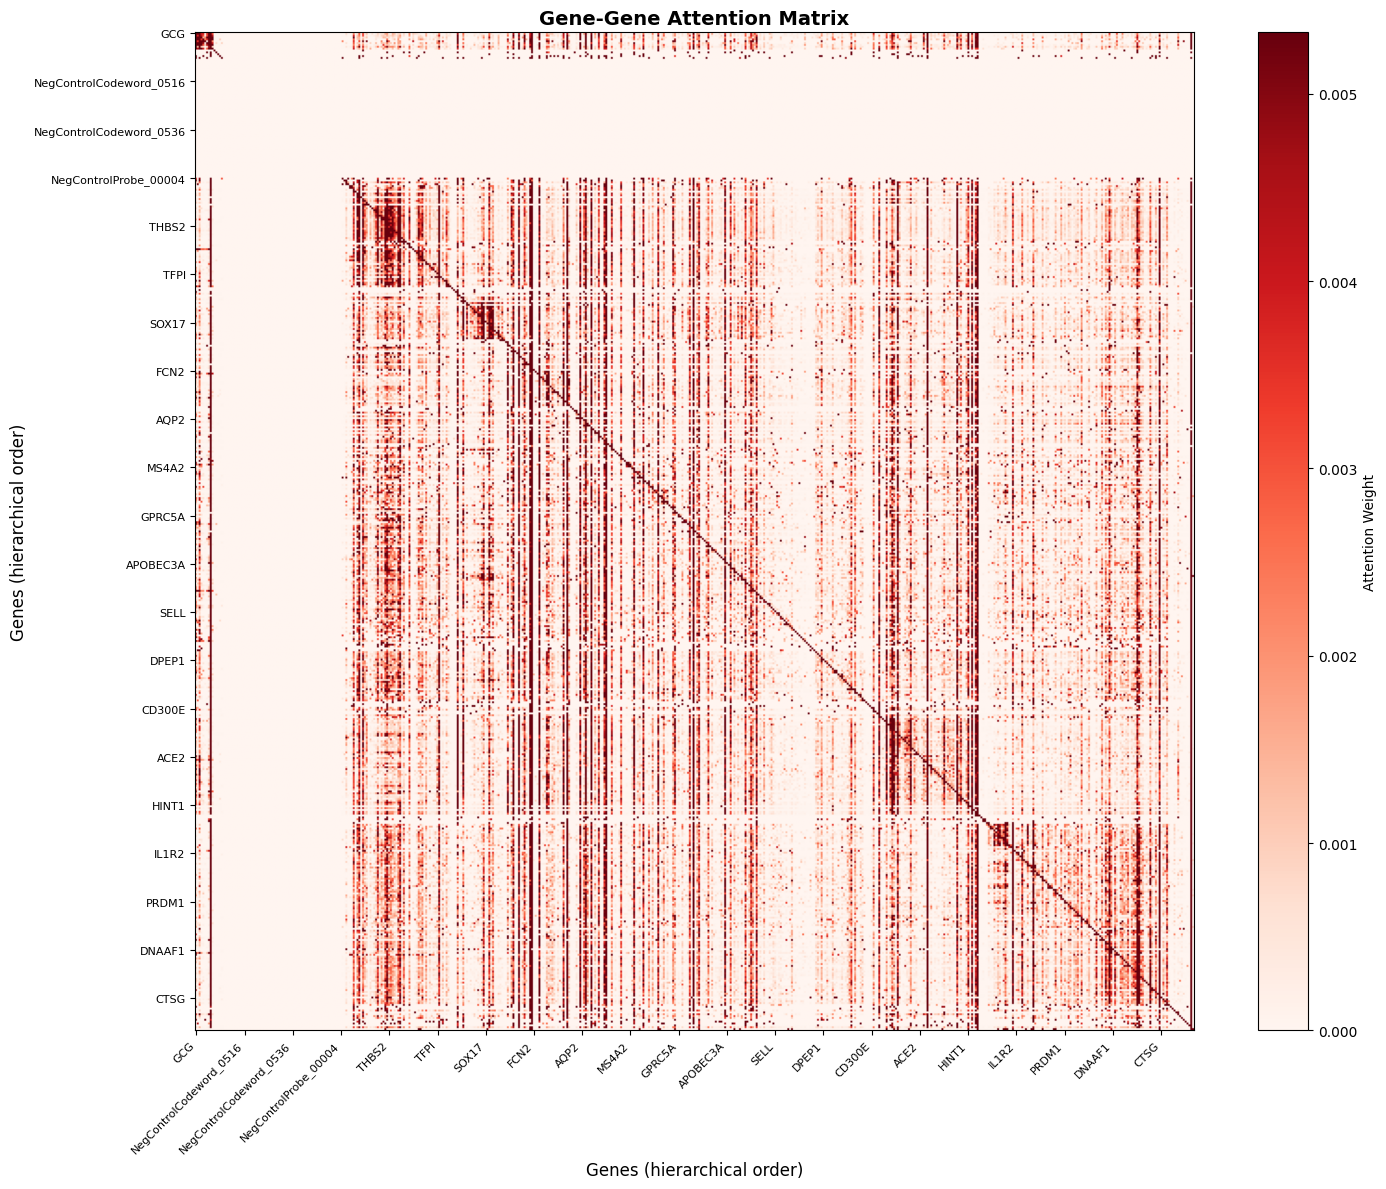

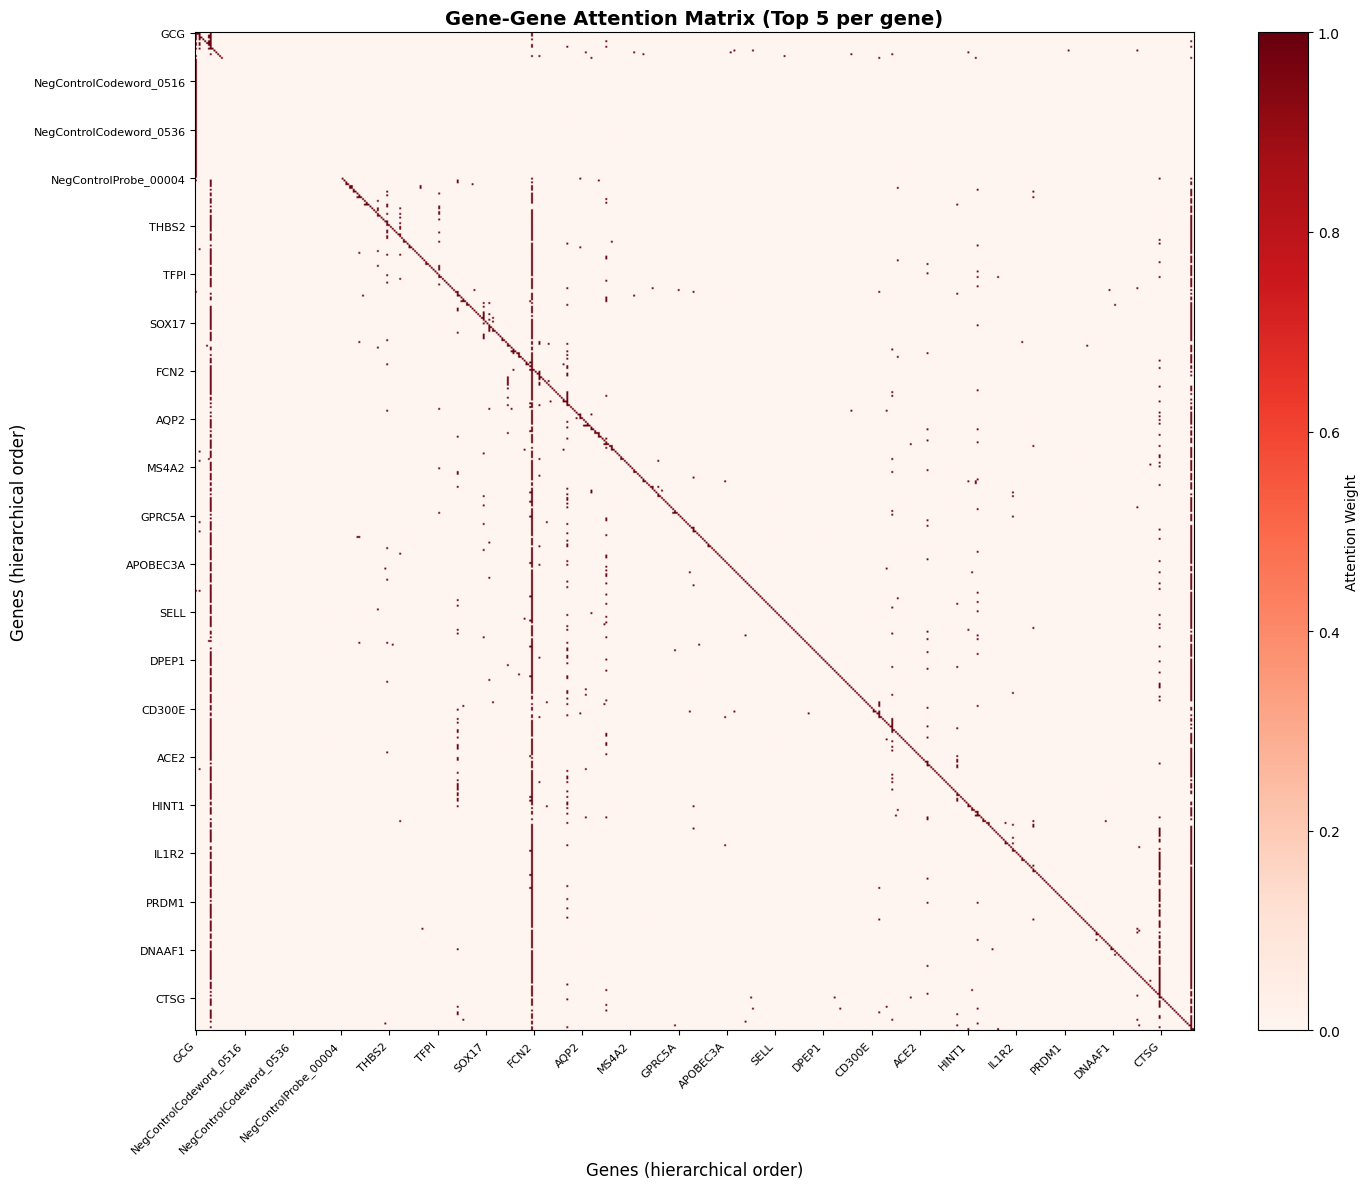

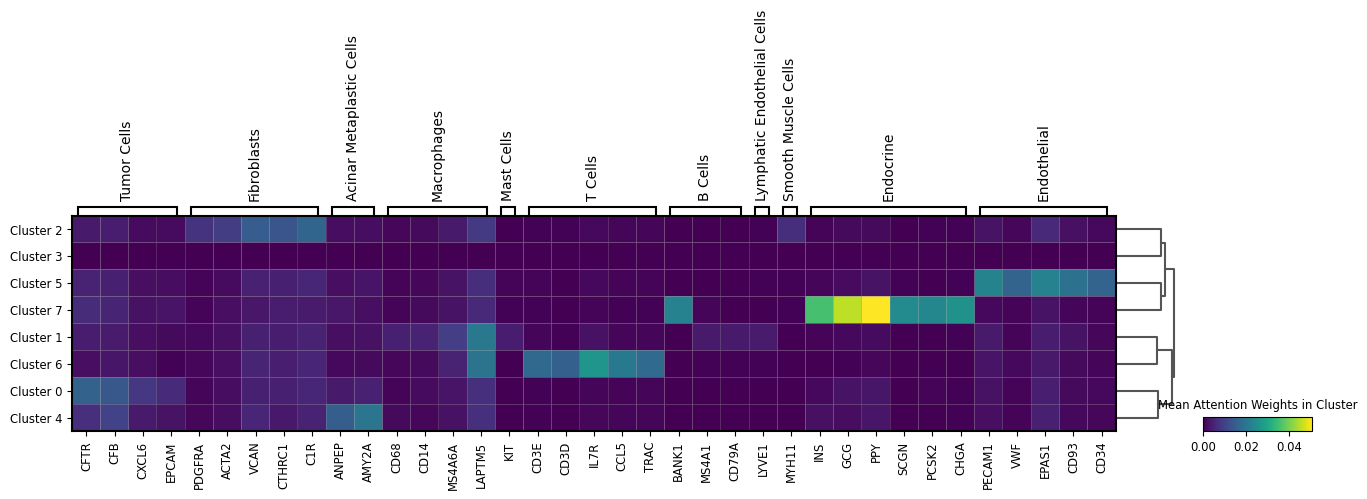

In [3]:
layer_index = 4

attention_matrices = attention_results['adj_matrix']

# Initialize the analyzer
unnormalized_analyzer = GeneGeneAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_heads=4, num_layers=5)

kwargs = {'attention_matrices': attention_matrices, 'gene_names': gene_names, 'layer_idx': layer_index, 'marker_genes_dict': marker_genes_dict, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_dotplot': None}

unnormalized_analyzer.run_complete_analysis(**kwargs)


Creating gene-gene attention heatmap...
Creating gene-gene attention heatmap...


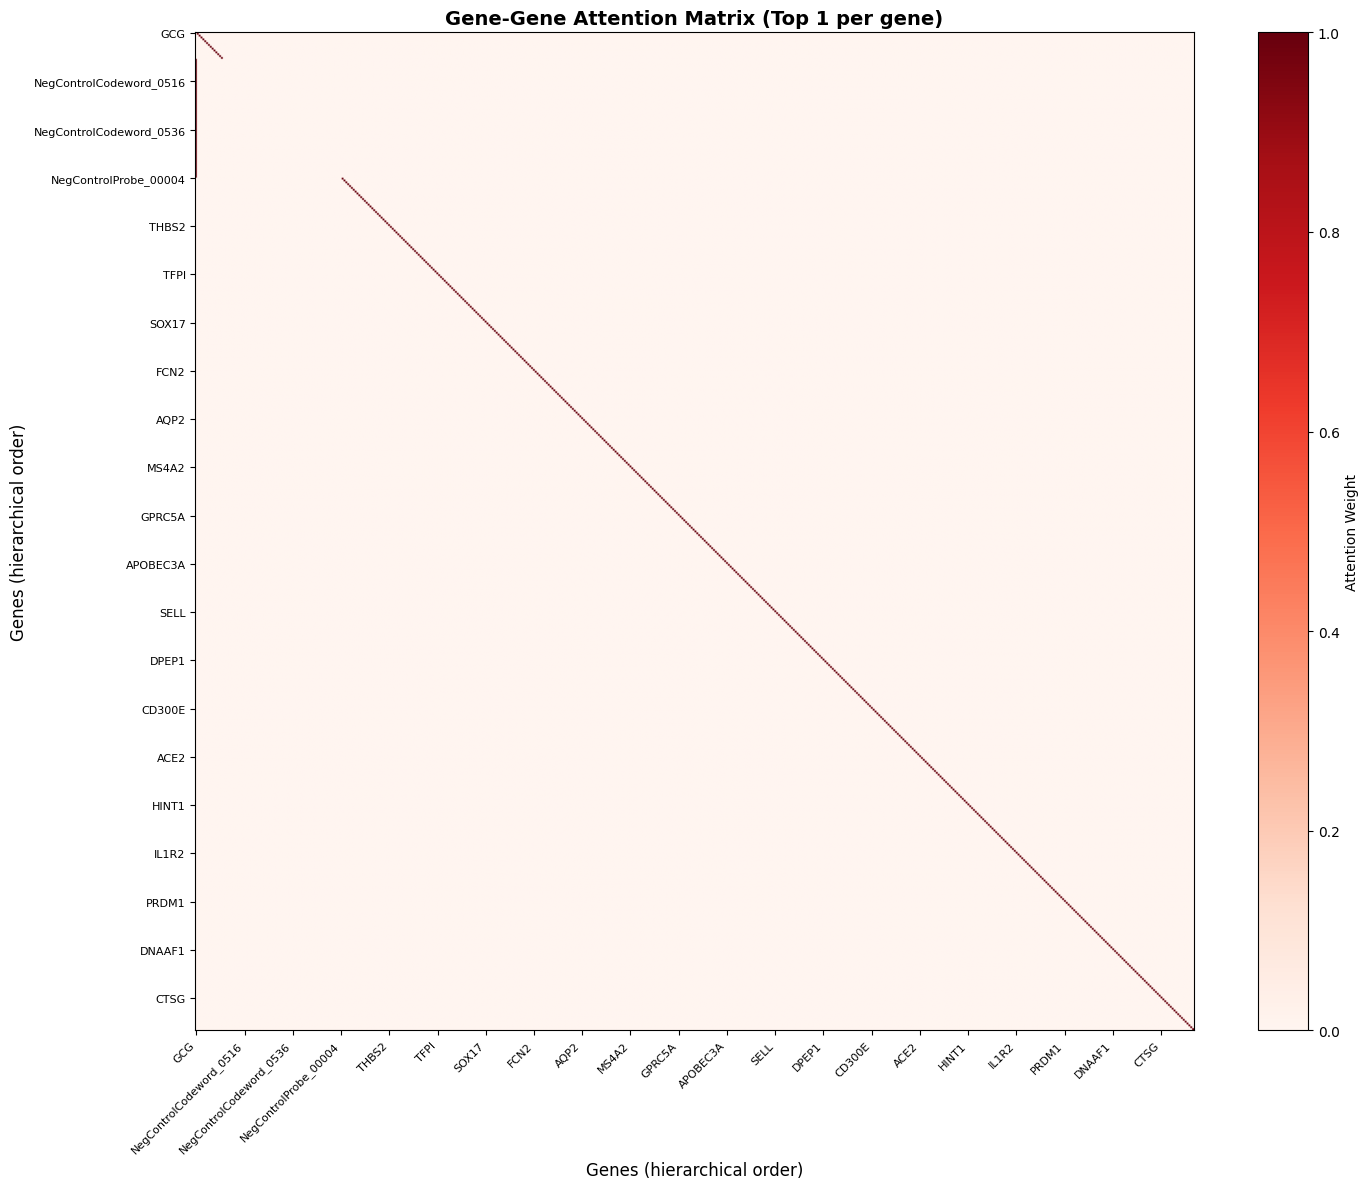

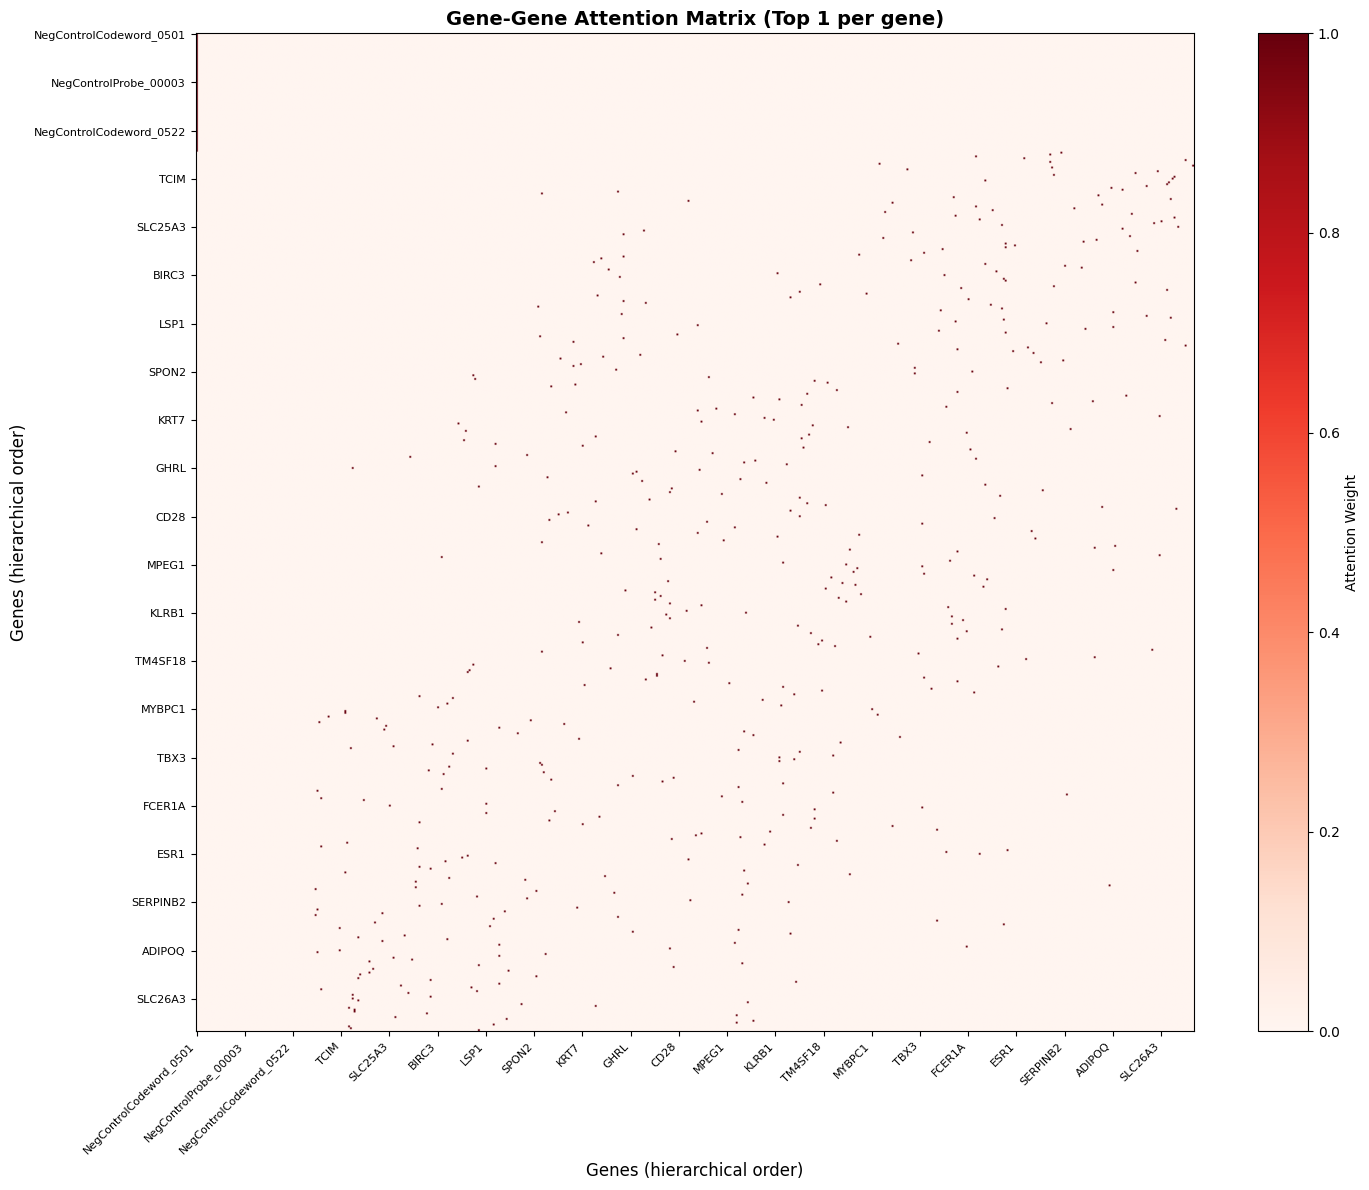

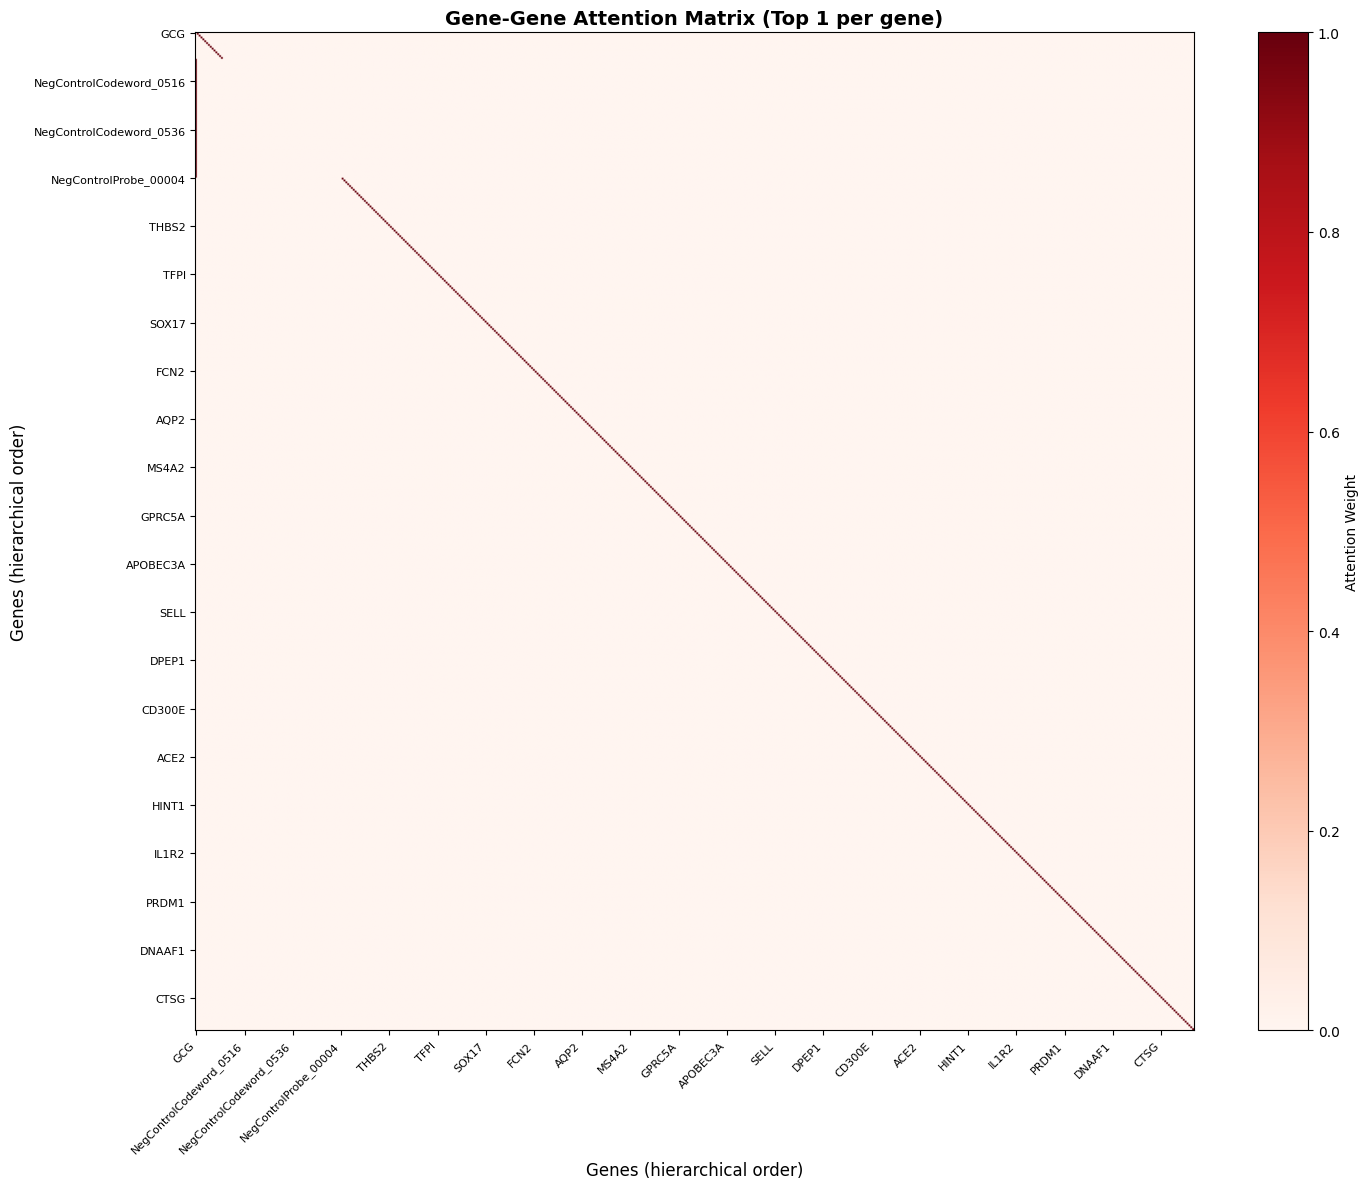

In [10]:
analyzer.visualize_gene_gene_heatmap(top_k=1, threshold = 0.001, save_path=None, figsize=(15, 12), vmin=None, vmax=None, max_genes=None)

unnormalized_analyzer.visualize_gene_gene_heatmap(top_k=1, threshold = 0.001, save_path=None, figsize=(15, 12), vmin=None, vmax=None, max_genes=None)

In [5]:
top_genes_dict = analyzer.get_top_genes_per_gene(top_k=5, threshold=0.001)

unnormalized_top_genes_dict = unnormalized_analyzer.get_top_genes_per_gene(top_k=5, threshold=0.001)

# discard the negative control genes in both top_genes_dict and unnormalized_top_genes_dict
negative_control_genes = [
    'NegControlProbe_00034', 'NegControlProbe_00004', 'NegControlCodeword_0526',
    'NegControlCodeword_0517', 'NegControlProbe_00035', 'NegControlCodeword_0514',
    'NegControlCodeword_0506', 'NegControlCodeword_0534', 'NegControlProbe_00041',
    'NegControlCodeword_0513', 'NegControlCodeword_0531', 'NegControlCodeword_0522',
    'NegControlCodeword_0523', 'NegControlProbe_00022', 'NegControlProbe_00031',
    'NegControlCodeword_0530', 'NegControlCodeword_0508', 'NegControlCodeword_0511',
    'NegControlCodeword_0510', 'NegControlProbe_00024', 'NegControlProbe_00039',
    'NegControlProbe_00002', 'NegControlCodeword_0528', 'NegControlCodeword_0540',
    'NegControlCodeword_0503', 'NegControlCodeword_0536', 'NegControlCodeword_0539',
    'NegControlProbe_00013', 'NegControlCodeword_0520', 'NegControlCodeword_0524',
    'NegControlCodeword_0533', 'NegControlProbe_00042', 'BLANK_0069',
    'NegControlProbe_00025', 'NegControlProbe_00017', 'NegControlCodeword_0502',
    'NegControlProbe_00003', 'NegControlCodeword_0515', 'NegControlCodeword_0537',
    'NegControlProbe_00012', 'NegControlProbe_00016', 'NegControlCodeword_0521',
    'NegControlCodeword_0507', 'NegControlCodeword_0529', 'NegControlProbe_00033',
    'NegControlCodeword_0505', 'NegControlCodeword_0519', 'NegControlCodeword_0509',
    'NegControlCodeword_0500', 'NegControlCodeword_0538', 'NegControlProbe_00014',
    'NegControlCodeword_0516', 'NegControlCodeword_0535', 'NegControlCodeword_0527',
    'NegControlCodeword_0504', 'NegControlCodeword_0525', 'NegControlCodeword_0512',
    'BLANK_0037', 'NegControlCodeword_0518', 'NegControlCodeword_0532',
    'NegControlProbe_00019', 'BLANK_0006', 'NegControlCodeword_0501'
]

top_genes_dict = {k: v for k, v in top_genes_dict.items() if k not in negative_control_genes}
unnormalized_top_genes_dict = {k: v for k, v in unnormalized_top_genes_dict.items() if k not in negative_control_genes}

Finding top 5 genes per gene...
Top genes identified for 538 genes
Finding top 5 genes per gene...
Top genes identified for 538 genes


In [8]:
# compute the similarity matrix between the normalized top gene dict and unnormalized top gene dict

def compute_gene_similarity(dict1, dict2):
    common_cells = set(dict1.keys()) & set(dict2.keys())
    if not common_cells:
        return 0.0
    
    similarities = []
    for cell in common_cells:
        genes1 = [gene for gene, score in dict1[cell]]
        genes2 = [gene for gene, score in dict2[cell]]
        set1 = set(genes1)
        set2 = set(genes2)
        intersection = len(set1 & set2)
        union = len(set1 | set2)
        sim = intersection / union if union > 0 else 0.0
        similarities.append(sim)
    
    return sum(similarities) / len(similarities)

# get the top genes per cluster
top_genes_dict = analyzer.get_top_genes_per_gene(top_k=5, threshold=0.001)

unnormalized_top_genes_dict = unnormalized_analyzer.get_top_genes_per_gene(top_k=5, threshold=0.001)

# compute the similarity matrix between the normalized top gene dict and unnormalized top gene dict
compute_gene_similarity(top_genes_dict, unnormalized_top_genes_dict)

Finding top 5 genes per gene...
Top genes identified for 538 genes
Finding top 5 genes per gene...
Top genes identified for 538 genes


0.025646132058771445